# Exploratory Data Analysis (EDA) in Python <br />  <hr style="border:4.5px solid #108999"> </hr>

This is my notebook on an example pipeline of EDA in Python.

## How to quickly get a handle on almost any tabular dataset

Becoming inherently familiar with a new dataset can be challenging and time consuming. However, an in-depth and broad exploratory data analysis (EDA) can help a lot to understand your dataset, get a feeling for how things are connected and what needs to be done to properly process your dataset.

This NB will explore multiple useful EDA routines. However, to keep things short and compact it might not always dig deeper or explain all of the implications. But, spending enough time on a proper EDA to fully understand a dataset is a key part of any good data science project.

>> As a rule of thumb, you probably will spend 80% of your time in data preparation and exploration and only 20% in actual machine learning modeli

---
## Overview

This is an exploratory data analysis on the House Prices Kaggle Competition found at 

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

* **In order to download the data directly from the 'Kaggle Competition' you need to go to the rules tab and accept the rules for this competition**
 > Navigate to the Kaggle competition rule tab to accept [here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/rules)

---

1. [Import Python Libraries](#t1.) 
2. [Get the Data](#t2.) 
3. [Structure Investigation](#t3.)
    * 3.1. [Structure of *non-numerical* features](#t3.1.) 
    * 3.2. [Structure of *numerical* features](#t3.2.)
    * 3.3. [Conclusion of structure investigation](#t3.3.)  
4. [Quality Investigation](#t4.)
    * 4.1. [Duplicates](#t4.1.)
    * 4.2. [Missing Values](#t4.2.)
        * 4.2.1 [Per Sample](#t4.2.1.)
        * 4.2.2 [Per Feature](#t4.2.2.)
        * 4.2.3 [Side Note](#t4.2.3.)
    * 4.3. [Unwanted entries and recording errors](#t4.3.)
        * 4.3.1 [Numerical Features](#t4.3.1.)
        * 4.3.2 [Non-Numerical Features](#t4.3.2.)
    * 4.4. [Conclusion of quality investigation](#t4.4.)
5. [Content Investigation](#t5.)
    * 5.1. [Feature Distribution](#t5.1.)
    * 5.2. [Feature Patterns](#t5.2.)
       * 5.2.1 [Continuous Features](#t5.2.1.)
       * 5.2.2 [Discrete and Ordinal Features](#t5.2.2.)
    * 5.3. [Feature Relationships](#t5.3.)
    * 5.4. [Conclusion of content investigation](#t5.4.)
6. [Take Home Message](#t6.)

## Outline
___

<a id="t1."></a>
## 1. Import Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno

<a id="t2."></a>
## 2. Get the Data

Using Pandas we can load the data from a .CSV file into a data frame.

If you would like to install the data  directly from Kaggle you can use: `pip install Kaggle` or `conda install Kaggle` - then use the `kaggle.api` package to install the data from Kaggle.

Otherwise download the data manually and load in the dataset using: `df = pd.read_csv("data.csv")`

### Downloading the data directly from Kaggle using the API:

Kaggle API requires an API token. Go to the Account Tab ( `https://www.kaggle.com/<username>/account`) and click ‘Create API Token’.  A file named kaggle.json will be downloaded. Move this file in to `~/.kaggle/` folder in Mac and Linux or to `C:\Users\<username>\.kaggle\`  on windows. This is required for authentication and do not skip this step.

In [6]:
# Initializing and Authenticating With API Server

from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

* **In order to download the data directly from the 'Kaggle Competition' you need to go to the rules tab and accept the rules for this competition**
 > Navigate to the Kaggle competition rule tab to accept [here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/rules)

 > Next you will be able to run the code below

In [7]:
api.competition_download_file('house-prices-advanced-regression-techniques','train.csv', path='./', force=False, quiet=True)
api.competition_download_file('house-prices-advanced-regression-techniques','test.csv', path='./', force=False, quiet=True)

> Another technique to download in the data from Kaggle directly yourself

Check which working directory you're in:

`%pwd`

Load the data

In [13]:
# importing the data from source
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

Selecting the 5 sample of the data for review the data of train/test.

In [19]:
# print the sample of the data
test_data.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
102,1563,20,RL,65.0,7832,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
558,2019,20,RL,75.0,8100,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal
686,2147,190,RL,NaN,10532,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Abnorml
380,1841,90,RL,NaN,10547,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
623,2084,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal


In [20]:
# print the sample of the data
train_data.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
545,546,50,RL,NaN,13837,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Normal,229000
1103,1104,20,RL,79.0,8910,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,159500
207,208,20,RL,NaN,12493,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,4,2008,WD,Normal,141000
840,841,70,RH,NaN,12155,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,140000
921,922,90,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,9,2008,WD,Normal,145900


2. Describe the Data

extract the shape of the training and testing datasets.

In [21]:
# shape of the dataset 
print("training have rows and columns:",train_data.shape)
print("test data have rows and columns:", test_data.shape)

training have rows and columns: (1460, 81)
test data have rows and columns: (1459, 80)


So we know that this dataset has 1460/1459 samples and 81/80 features. And how many different data types do these 81/80 features contain?

In [24]:
# info the data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [36]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [37]:
#describe the statistics in data
train_data.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [38]:
test_data.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1459.000000,1459.000000,1455,1232.000000,1459.000000,1459,107,1459,1459,1457,...,1459.000000,1459.000000,3,290,51,1459.000000,1459.000000,1459.000000,1458,1459
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,1,...,NaN,NaN,2,4,3,NaN,NaN,NaN,9,6
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal
freq,NaN,NaN,1114,NaN,NaN,1453,70,934,1311,1457,...,NaN,NaN,2,172,46,NaN,NaN,NaN,1258,1204
mean,2190.000000,57.378341,NaN,68.580357,9819.161069,NaN,NaN,NaN,NaN,NaN,...,17.064428,1.744345,NaN,NaN,NaN,58.167923,6.104181,2007.769705,NaN,NaN
std,421.321334,42.746880,NaN,22.376841,4955.517327,NaN,NaN,NaN,NaN,NaN,...,56.609763,30.491646,NaN,NaN,NaN,630.806978,2.722432,1.301740,NaN,NaN
min,1461.000000,20.000000,NaN,21.000000,1470.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN
25%,1825.500000,20.000000,NaN,58.000000,7391.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,4.000000,2007.000000,NaN,NaN
50%,2190.000000,50.000000,NaN,67.000000,9399.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN
75%,2554.500000,70.000000,NaN,80.000000,11517.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN


<a id="t3.1."></a>
### 3.1.    Structure of non-numerical features

First, inspect the **non-numerical** entries.

> When you pass exclude="number" to df.describe, pandas excludes all the columns in the dataframe whose data types are subclasses of numpy.number 
> only the non-numeric columns remain in the dataframe. This is useful when you want to see only the categorical variables' summary


In [39]:
# Display non-numerical features
train_data.select_dtypes(exclude="number").head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [42]:
categorical_features = train_data.select_dtypes(include=[np.object])

categorical_features.columns

C:\Users\kevin\AppData\Local\Temp\ipykernel_32912\1407662420.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = train_data.select_dtypes(include=[np.object])


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

<a id="t3.2."></a>
### 3.2.    Structure of numerical features

Next, take a closer look at the numerical features. More precisely, investigate how many unique values each of these feature has. This process will give some insights about the number of **binary** (2 unique values), **ordinal** (3 to ~10 unique values) and **continuous** (more than 10 unique values) features in the dataset.

In [44]:
# For each numerical feature compute number of unique entries
unique_values = train_data.select_dtypes(include='number').nunique().sort_values()

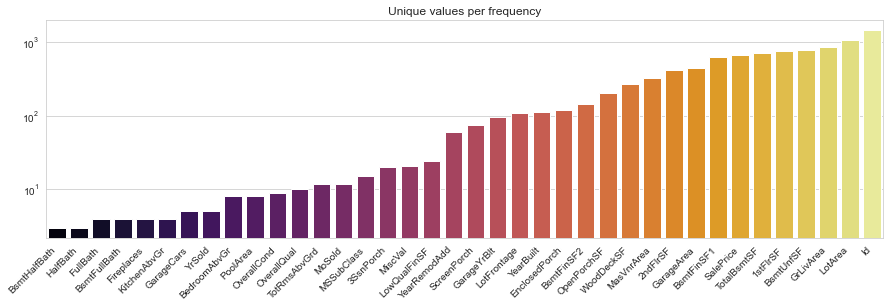

In [45]:
plt.figure(figsize=(15, 4))
sns.set_style('whitegrid')

g = sns.barplot(x=unique_values.index, y=unique_values, palette='inferno')
g.set_yscale("log")
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title('Unique values per frequency')
plt.show()

<a id="t3.3."></a>
### 3.3.    Conclusion of structure investigation

At the end of this first investigation, we should have a better understanding of the general structure of our dataset. Number of samples and features, what kind of data type each feature has, and how many of them are binary, ordinal, categorical or continuous. For an alternative way to get such kind of information you could also use `df_X.info()` or `df_X.describe()`.

<a id="t4."></a>
## 4. Quality Investigation

Before focusing on the actual content stored in these features, let's first take a look at the general quality of the dataset. The goal is to have a global view on the dataset with regards to things like duplicates, missing values and unwanted entries or recording errors.

<a id="t4.1."></a>
### 4.1.    Duplicates

Duplicates are entries that represent the same sample point multiple times. For example, if a measurement was registered twice by two different people. Detecting such duplicates is not always easy, as each dataset might have a unique identifier (e.g. an index number or recording time that is unique to each new sample) which you might want to ignore first.

In [47]:
# Check number of duplicates while ignoring the index feature
n_duplicates = train_data.duplicated().sum()
print(f"You seem to have {n_duplicates} duplicates in your database.")

You seem to have 0 duplicates in your database.


In [48]:
# Check number of duplicates while ignoring the index feature
n_duplicates = test_data.duplicated().sum()
print(f"You seem to have {n_duplicates} duplicates in your database.")

You seem to have 0 duplicates in your database.


<a id="t4.2."></a>
### 4.2.    Missing Values

Another quality issue worth to investigate are missing values. Having some missing values is normal. What we want to identify at this stage are big holes in the dataset, i.e. samples or features with a lot of missing values.

Text(115.0, 0.5, 'Sample')

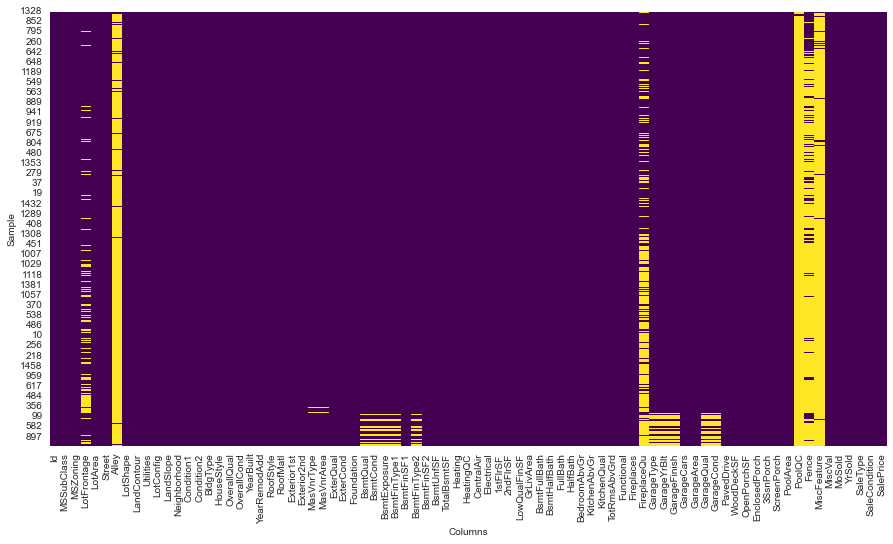

In [56]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')

g = sns.heatmap(train_data.loc[train_data.isnull().sum(1).sort_values(ascending=1).index].isnull(), cbar=False, cmap ='viridis')
g.set_xlabel('Columns')
g.set_ylabel('Sample')

This figure shows on the y-axis each of the 360'000 individual samples, and on the x-axis if any of the 80 features contains a missing value. While this is already a useful plot, an even better approach is to use the [missingno](https://github.com/ResidentMario/missingno) library, to get a plot like this one:

In [57]:
import missingno as msno

<AxesSubplot:>

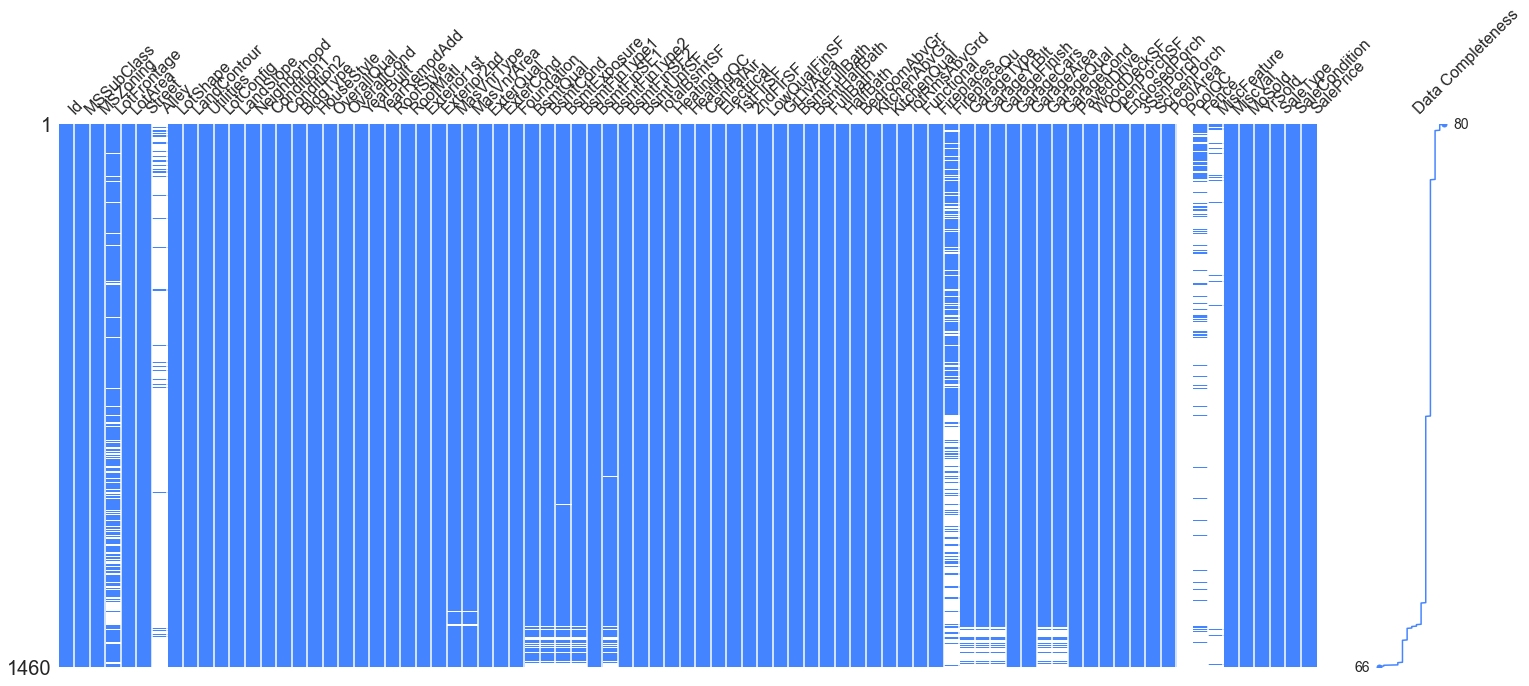

In [61]:
msno.matrix(train_data, labels=True, sort='descending',color=(0.27, 0.52, 1.0))

<AxesSubplot:>

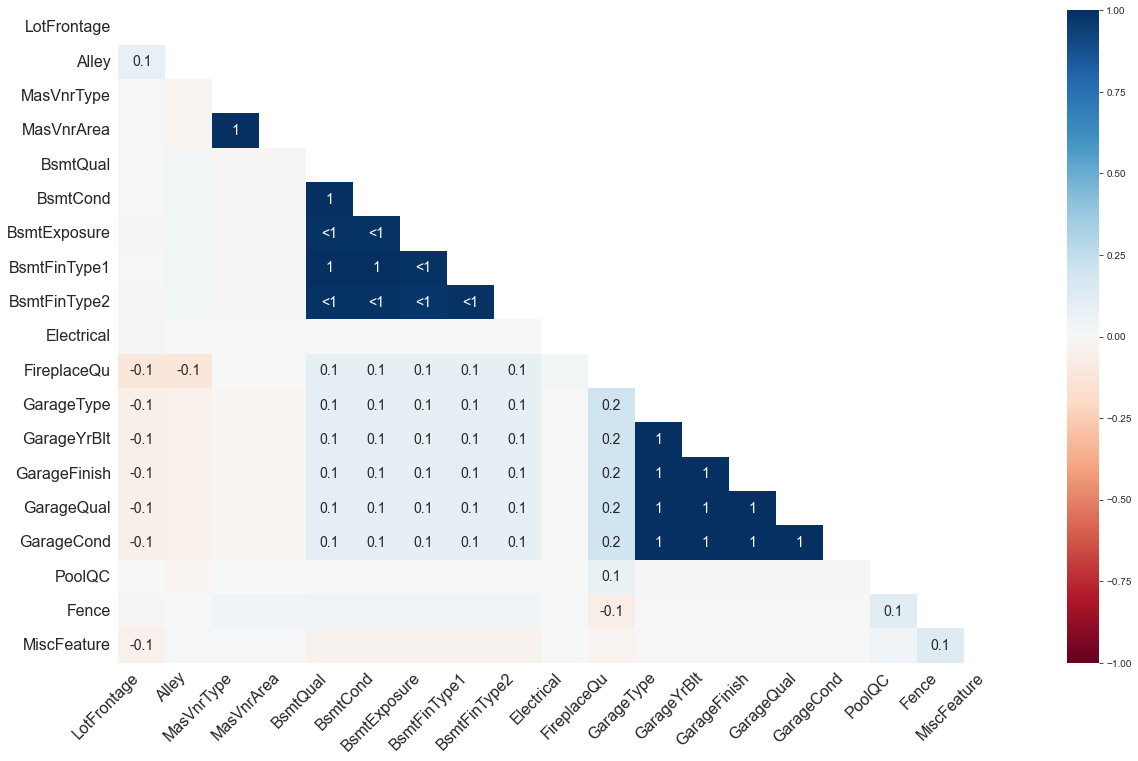

In [67]:
msno.heatmap(train_data)

> Dendrogram
The dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap:

<AxesSubplot:>

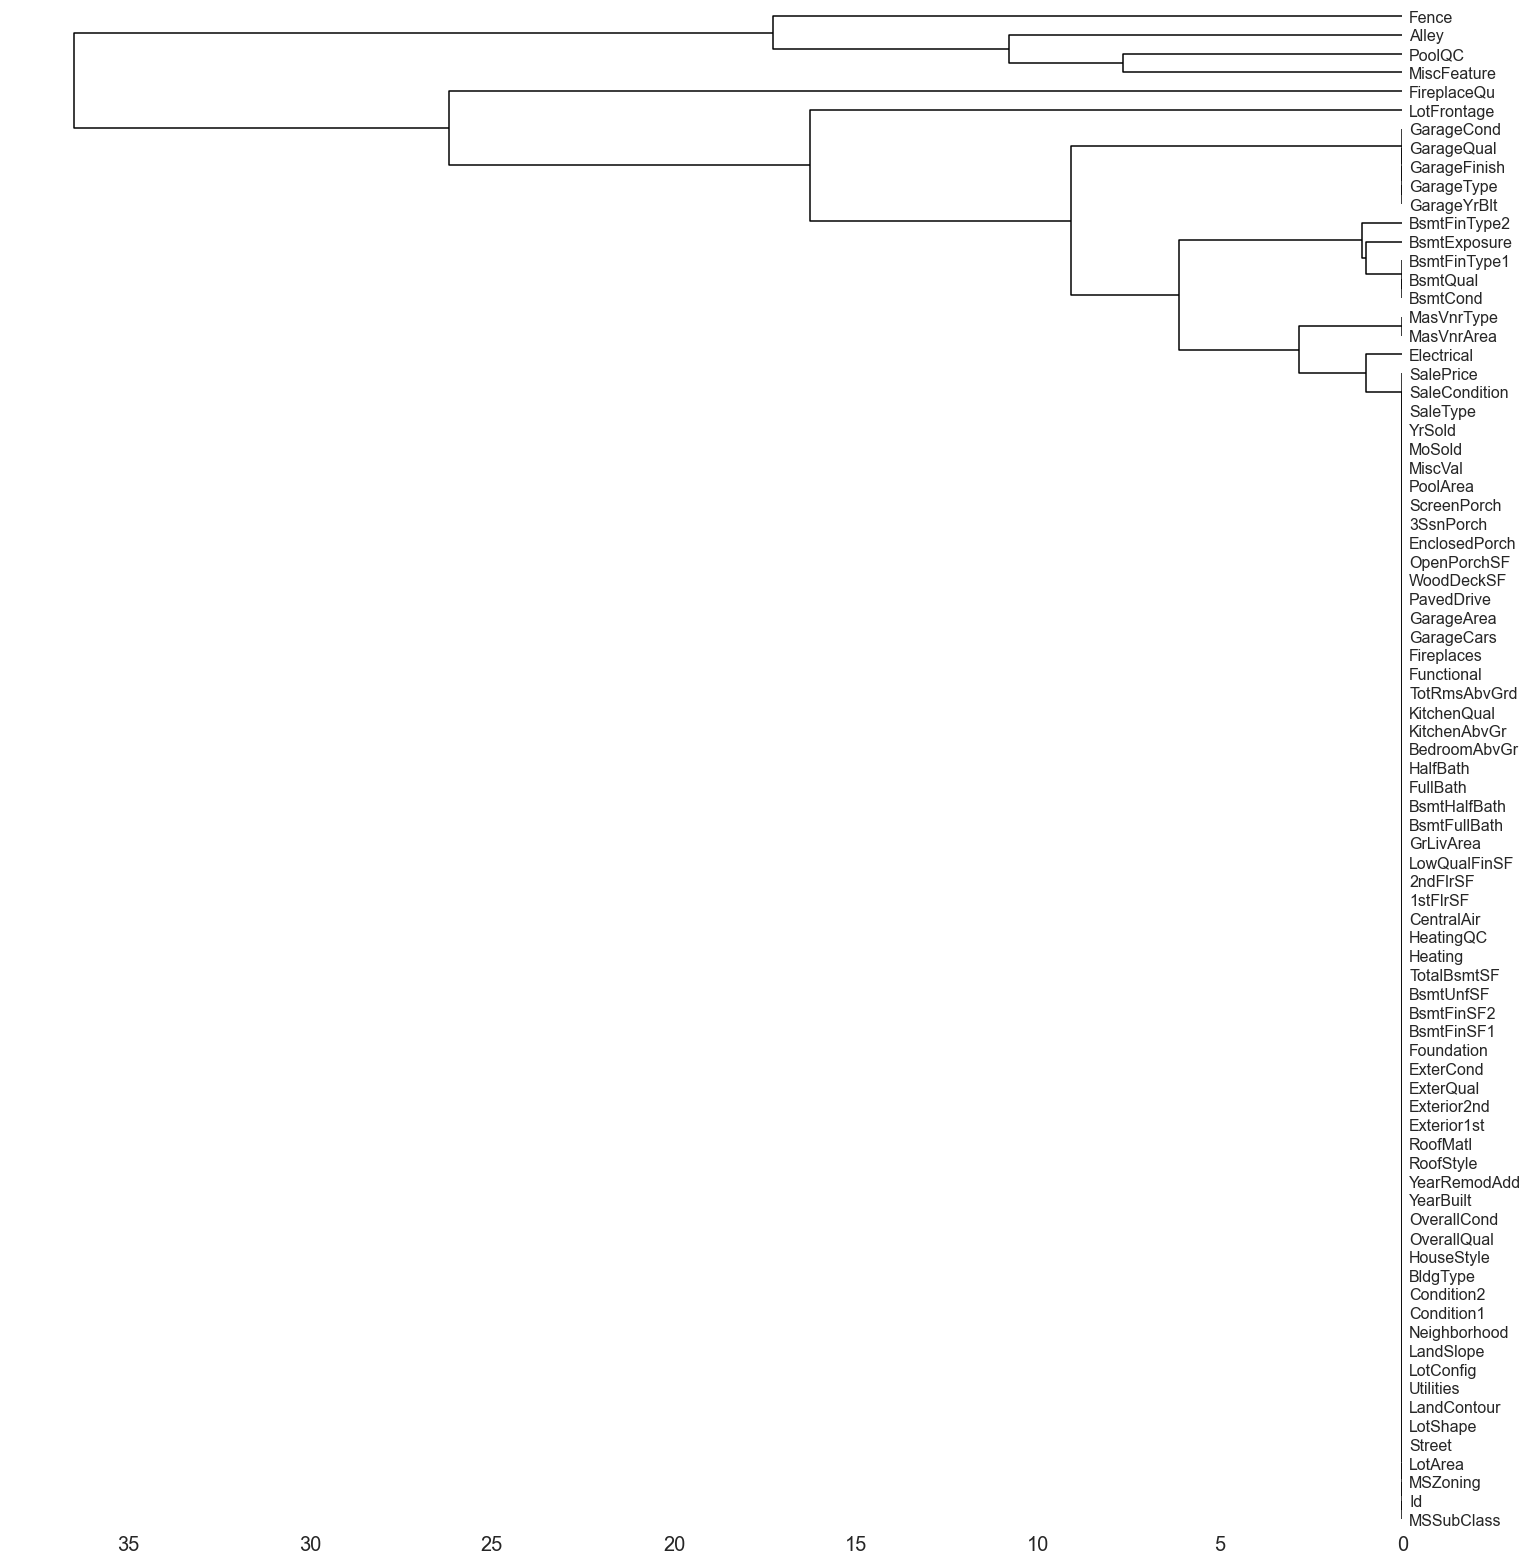

In [69]:
msno.dendrogram(train_data)

[Text(0, 0, 'PoolQC'),
 Text(1, 0, 'MiscFeature'),
 Text(2, 0, 'Alley'),
 Text(3, 0, 'Fence'),
 Text(4, 0, 'FireplaceQu'),
 Text(5, 0, 'LotFrontage'),
 Text(6, 0, 'GarageYrBlt'),
 Text(7, 0, 'GarageType'),
 Text(8, 0, 'GarageFinish'),
 Text(9, 0, 'GarageQual'),
 Text(10, 0, 'GarageCond'),
 Text(11, 0, 'BsmtExposure'),
 Text(12, 0, 'BsmtFinType2'),
 Text(13, 0, 'BsmtFinType1'),
 Text(14, 0, 'BsmtCond'),
 Text(15, 0, 'BsmtQual'),
 Text(16, 0, 'MasVnrArea'),
 Text(17, 0, 'MasVnrType'),
 Text(18, 0, 'Electrical'),
 Text(19, 0, 'KitchenQual'),
 Text(20, 0, 'BedroomAbvGr'),
 Text(21, 0, 'HalfBath'),
 Text(22, 0, 'FullBath'),
 Text(23, 0, 'BsmtHalfBath'),
 Text(24, 0, 'TotRmsAbvGrd'),
 Text(25, 0, 'BsmtFullBath'),
 Text(26, 0, 'KitchenAbvGr'),
 Text(27, 0, 'Functional'),
 Text(28, 0, 'Id'),
 Text(29, 0, 'GrLivArea'),
 Text(30, 0, 'GarageCars'),
 Text(31, 0, 'GarageArea'),
 Text(32, 0, 'PavedDrive'),
 Text(33, 0, 'WoodDeckSF'),
 Text(34, 0, 'OpenPorchSF'),
 Text(35, 0, 'EnclosedPorch'),
 Text(

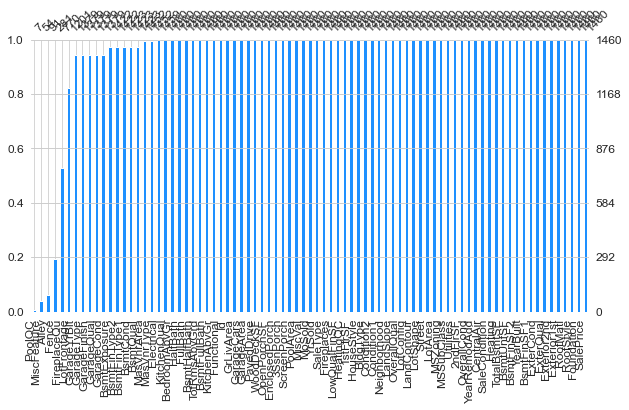

In [65]:
g = msno.bar(train_data, labels=True, color='dodgerblue', sort='ascending', figsize=(10,5), fontsize=12)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

Lets drop ID to reduce redundant features

In [71]:
train_data = train_data.drop(labels = ["Id"], axis = 1)
test_data = test_data.drop(labels = ["Id"], axis = 1)